## Roteiro 1 - Tipos de dados/Introdução à Análise Descritiva/ Tabelas e Gráficos (1ª semana)



Observação: Vocês deverão fazer uma cópia deste notebook e editar seu próŕio arquivo

## Objetivo

Trabalhar com a base de dados PolliceKillingUS com ajuda da ferramenta Google Colab e utilização da linguagem de programação Python, de maneira a fixar os Seguintes conteúdos: 
*   Tipos de dados
*   Introdução à análise descritiva
*   Tabelas e gráficos

# 1- Obtendo a base dados


Para obter a base de desse roteiro iremos utilizar o Kaggle. O Kaggle é uma plataforma onde empresas e pessoas físicas postam bases de dados e criam competições de aprendizado de máquina, *deep learning* e análise de dados. No nosso caso, você não irá entrar em nenhuma competição, apenas fazer o *download* da base de dados. 

Para isso, vá até o endereço  https://www.kaggle.com . Se você não possui uma conta terá que criar, então escolha uma das opções cadastro e faça *login* em seguida. 

Agora que você entrou na plataforma, digite: Fatal Police Shootings in the US no campo "search", escolha o primeiro *dataset* by Karolina Wullum. Clique na opção "download", isso deverá baixar para o seu computador um arquivo chamado "2647_4395_bundle_archive", você deve então descompactá-lo.



## 1.1 - Subindo a base de dados para o Colab

Para subir a nossa base de dados para o Colab, você deve clicar no icone com formato de pasta (files) no menu lateral esquerdo e seguida na opção *upload*. 
Após isto, navegue até a base de dados descompactada e escolha o arquivo **PolliceKillingUs.csv**.






# 2 - Leitura dos dados

Para ler nosso arquivo csv no python, vamos fazer a inclusão da biblioteca pandas, utilizar o comando:
 `read.csv("nomeDoSeuArquivo,csv", encoding= 'unicode_escape', index_col=0)` e armazenar o resultado em uma variável, que representará o seu *dataset*.  A biblioteca chama essa representação virtual de *DataFrame*. 

 Execute o código da célula abaixo para realizar estes passos.
 



In [3]:
import pandas as pd

policeKillingDF = pd.read_csv("PoliceKillingsUS.csv", encoding= 'unicode_escape', )


Dê uma olhada nos dados utilizando o comando ```seuDataset.head()```

*substitua o termo "seuDataset" pelo nome da sua variavel.

In [4]:
#Exercício 1
policeKillingDF.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# 3 - Descrição do dataset

Este dataset trata de mortes de civís executadas por policíais nos Estados Unidos. Se trata de uma base de dados construída pelo Wahsington Post entre os meses de Janeiro de 2015 à dezembro de 2017. 

Essa base começou a ser  montada após o assassinato de Michael Brown na cidade de Ferguson, estado do Missouri, evento que deu inicio ao movimento Black Lives Matter. 

Você pode ver uma breve descrição de cada coluna na lista abaixo:

* name - O nome da pessoa assassinada
* date - A data do acontecimento
* manner_of_death - A maneira pela qual o assassinato se deu.
* armed - O tipo de arma utilizada pelo civíl.
* age - A idade da civíl
* gender - O gênero biológico.
* race - A raça
* city - A cidade onde aconteceu o evento
* state - O estado onde aconteceu o evento
* signs_of_mental_illness - Se a vítima estava passando por alguma crise de saúde mental
* threat_level - O nível de ameaça que individuo apresentava
* flee - Se a pessoa estava em fuga
* body_camera - Se a pessoa usava alguma camera.




Agora observe mais algumas informações do *dataset* utilizando o comando `seuDataset.info()`

In [5]:
#Exercício 2
policeKillingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

 # 4. Tratamento os dados
Como você viu, temos um conjunto de dados, ou *dataset* com 2535 linhas e 13 colunas. Nessa *dataset* podemos dizer que cada linha representa uma unidade amostral e cada coluna representa uma variável. Desse modo possuímos uma amostra de tamanho 2535 com 13 variáveis observadas.


Perceba que as colunas **armed, age, race** e **flee** possuem respectivamente 9, 78, 195 e 65 valores nulos. Isso significa que estes dados estão faltando na nossa tabela e dessa forma ficamos impossibilitados de fazer uma análise correta. Precisamos tratar estes dados. 

Na coluna **armed** esse valores representam 0.35% dos valores totais, na **age** 3.07%, na **race** 7,69% e na **flee**  2.54%. A literatura propõe algumas técnicas disponíveis para substituír esses dados. Por exemplo, para dados contínuos podemos subistituir utilizando a média dos demais, já para categoricos (por exemplo genero, estado, raça) uma possibilidade pode ser a substituição do dado faltante pela categoria mais frequente na variável.

Contudo, felizmente, nossos dados faltantes não representam uma porcentagem significativa no total de linhas disponíveis, isto é, representam menos que 70% dos dados, por isso iremos utilizar a estratégia  mais simples e radical: vamos excluí-los da tabela. 

Para isso executem o comando: `seuDataset.dropna(inplace=True)`



In [6]:
#Exercicío 3

policeKillingDF.dropna(inplace=True)

Execute novamente o comando `seuDataset.info()`




In [7]:
#Execício 4

policeKillingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

Reparem que agora temos 2254 linhas, isto acontece porque este comando exclui qualquer linha cujo alguma coluna possua valores nulos.

À essa altura você deve ter percebido que nem todas as colunas estão no formato em que deveriam estar. Por exemplo, a variável **age**, que representa idade parecec estar no formato de dados contínuo, sabemos que idade é um atributo discreto (tipo inteiro) por isso vamos converter esse coluna  para o formato **int**, que representa o formato dos números inteiros em python.

Além disso a variável **date** parece estar em formato de texto. Apesar de não estar "errado" representar datas dessa forma, existe um tipo próprio para este tipo de variável no python, o tipo **datetime**, convertê-la para esse tipo irá facilitar bastante sua manipulação quando necessário.

Na célula abaixo, mostramos como executar essas duas tansformações



In [8]:
#Corrigindo os formatos das variáveis e substituindo no dataset

age_int = (policeKillingDF['age'].copy()).astype(int)
policeKillingDF.loc[:,'age'] = age_int


date_datetime = pd.to_datetime(policeKillingDF['date'].copy())
policeKillingDF.loc[:,'date'] = date_datetime


Execute novamente o comando `.head()` no seu dataframe e perceba que agora as váriaveis estão nos tipos que definimos.


In [9]:
#Exercício 5

policeKillingDF.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


Apenas por questões visuais vamos  subsitutir as siglas de cada estado americano na coluna *state* pelo nome do estado por extenso. Execute o código abaixo para modificar a coluna e observe o resultado.

In [10]:
!pip install us

import us

def mapping_USstates(state):
    return us.states.lookup(state).name

policeKillingDF.loc[:,'state'] = policeKillingDF['state'].map(mapping_USstates)
policeKillingDF.head()

     |████████████████████████████████| 133kB 4.1MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11927 sha256=1d86578169e9af0f41227b897ffe880e82a0a2d430e43379efebb74445e99580
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74744 sha256=e709994aac55fdb43245aad054daffd6a136eaf636ac692439890ad3d921795b
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,Washington,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,Oregon,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,Kansas,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,California,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,Colorado,False,attack,Not fleeing,False


Além dessa modificação, outra mudança pertinente a se fazer nessa base de dados é a desagregação da coluna ***date***. Nós podemos usar esta coluna para gerar mais duas outras: ano e mês. Isso pode nos ajudar a extraír informações realicionadas a temporalidade dos eventos.

Execute a celula abaixo para realizar essa transformação.


In [11]:
import calendar

policeKillingDF['month'] = policeKillingDF['date'].map(lambda l : calendar.month_abbr[l.month])
policeKillingDF['year'] = policeKillingDF['date'].map(lambda l :l.year)
policeKillingDF.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month,year
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,Washington,True,attack,Not fleeing,False,Feb,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,Oregon,False,attack,Not fleeing,False,Feb,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,Kansas,False,other,Not fleeing,False,Mar,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,California,True,attack,Not fleeing,False,Apr,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,Colorado,False,attack,Not fleeing,False,Apr,2015


#4. Tipos de dados

Agora que nossos dados estão tratados, utilize o conhecimento adquirido nas aulas para inferir  o tipo de dado de cada variável da tabela.

Edite a celula abaixo completado os tipos de dados para cada coluna.



``#`` Exercício 6

name: Qualitativa - Nominal <br/>
date: Qualitativa - Ordinal<br/> 
manner_of_death: Qualitativa - Nominal <br/>
armed: <br/>
age: <br/>
gender: <br/>
race: <br/>
city: <br/>
state: <br/>
signs_of_mental_illness: <br/>
threat_level: <br/>
flee: <br/>
body_camera: <br/>


# 5 - Construindo tabelas


Vamos exercitar um pouco o conceito de distribuíção de frequência de uma variável. Você deve se lembrar que para cada tipo de dado, existe uma ferramenta de visualização e estudo adequados.

Uma boa maneira de análisar variaveis qualitativas é criar uma tabela de frequência. Neste exercicio você vai analisar a variável ***gender***, que indica o gênero da pessoa assassinada, e entender como essa variável está distiribuída na nossa amostra.

Já que vamos trabalhar apenas com uma variável amostral do *dataset*, que tal recuperar essa variável e armazená-la em uma variável do python?

No exercício 7, crie uma variavel chamada `genero`e armazene nela todo os dados da variável amostral gender do nosso dataset. Depois digite o comando `print(nomeDaMinhaVariável)` e veja o que acontece.



Dica: Utilize o comando `minhaVariavel = meuDataset["nomeDaVariavelAmostral"]`  para atribuir os valores da variável amostral na sua variável do python. 


In [12]:
#Exercício 7

genero = policeKillingDF['gender']
print(genero)

0       M
1       M
2       M
3       M
4       M
       ..
2519    M
2523    M
2525    M
2533    M
2534    M
Name: gender, Length: 2254, dtype: object


Agora que já isolamos nossa variável amostral vamos contar quantas entradas possuímos para cada gênero. Para fazer isso, você irá utilizar o método `.value_counts()`. 

Execute o comando `genero.value_counts()` e veja o que acontece.

In [13]:
#Exercício 8
genero.value_counts()

M    2160
F      94
Name: gender, dtype: int64

Bem, agora nós sabemos que das pessoas assassinadas 2160 eram do sexo masculino e apenas 94 do sexo feminno. Curioso, não é?

O próximo passo é armazenar o valor da nossa contagem em uma variável. Crie uma váriavel chamada `contagemGenero` e armazene o valor retornado pelo `value_counts()`.

O valor da contagem de cada gênero corresponde a frequência absoluta de cada gênero, mas você sabe quantos por cento esse valor representa em relação ao número total amostras da nossa variável amostral? 

Crie duas variáveis chamadas **masculinoFreqRelativa** e **femininoFreqRelativa** e armazene nelas o valor de suas frequência absolutas dividas pelo número total de amostras e depois multiplique o resultado final por 100. 


* Dicas: 
    * Se você nao lembra o número total de amostras, dê uma olhada no Exercício 4.
    * Para acessar os valores de contagem masculino e feminino individualmente utilize a sintaxe `minhaContagem[0]` e `minhaContagem[1]`

In [14]:
#Exercício 9

contagemGenero = genero.value_counts()
masculinoFreqRelativa = (contagemGenero[0]/len(genero))*100.0
femininoFreqRelativa = (contagemGenero[1]/len(genero))*100.0

Pronto, agora temos tudo que precisamos para construír a nossa tabela com frequências absolutas e relativas. 

No exercício 10, complete e execute o código para criar a tabela de frequências.

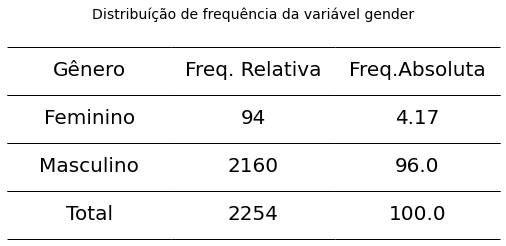

In [15]:
#Exercício 10

import matplotlib.pyplot as plt
import numpy as np

data = [
        ['Gênero', 'Freq. Relativa', 'Freq.Absoluta'],
        [ 'Feminino', contagemGenero[1], np.round(femininoFreqRelativa,2)],
        [ 'Masculino',contagemGenero[0], np.round(masculinoFreqRelativa)],
        ['Total', np.sum(contagemGenero),(femininoFreqRelativa + masculinoFreqRelativa)]]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(4,3,1)

ax.set_title("Distribuíção de frequência da variável gender",fontsize=14 )
ax.title.set_position([.5, 1.5])

table = ax.table(cellText=data,
          loc = 'center',         
          cellLoc = 'center',
          edges = 'BT',)

table.set_fontsize(24)

table.scale(2,4)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)


plt.show()


# 6 Construíndo gráficos

Agora que você relembrou o conceito de frequência vamos explorar mais os dados e construir alguns gráficos. Os gráficos nos ajudam a entender melhor os dados e extraír informações que estão inicialmente ocultas.


Sempre que você quiser construír um gŕafico, é necessário definir os eixos X e Y. A definição de qual variável vai em cada eixo depende do tipo de gráfico e do aspecto que você quer evidenciar. Por exemplo, se quisermos construir um gráfico para visualizar a quantidade de mortes ocorridas por estado, podemos escolher um gráfico de colunas onde o eixo X identificará os estados e a eixo Y a quatidade de mortes.

Nos próximos exercicíos você aprenderá a construir alguns tipos de gráficos.

### 6.1 Identificando número de mortes por estado (Gráfico de colunas) 


Para construír esse gráfico, você precisará realizar a contagem de mortes ocorridas em cada estado. Vamos fazer isso utilizando o método `groupby()`da biblioteca Pandas. Neste método você precisará definir a função de agregação que será utilizada, isto é, o processo pelo qual você deseja agupar os seus dados, no nosso caso escolheremos o método `size()` para realizar a contagem. 

Além disso você ainda terá que escolher a coluna pela qual nós queremos agrupar nossa contagem, no nosso caso a coluna ***state***.

Observe o resultado dessa operação  executando a célula do exercício 11
.


In [16]:
#Exercício 11
mortesAgrupadasEstado = policeKillingDF.groupby(by="state").size()
print(mortesAgrupadasEstado)


state
Alabama                  45
Alaska                   14
Arizona                 105
Arkansas                 20
California              366
Colorado                 63
Connecticut               7
Delaware                  8
District of Columbia     11
Florida                 136
Georgia                  61
Hawaii                   11
Idaho                    14
Illinois                 56
Indiana                  40
Iowa                     12
Kansas                   24
Kentucky                 40
Louisiana                47
Maine                    10
Maryland                 36
Massachusetts            22
Michigan                 36
Minnesota                31
Mississippi              22
Missouri                 58
Montana                  11
Nebraska                 14
Nevada                   34
New Hampshire             7
New Jersey               30
New Mexico               41
New York                 43
North Carolina           66
North Dakota              4
Ohio          


Complete o Exercício 12 preenchendo os valores que serão apresentados no eixo X, utilizando o atributo `.index` da variável **mortesAgrupadasEstado** e as alturas de cada barra (eixo Y) com os valores obtidos na contagem, utilizando o atributo `.values` da mesma variável.

Preencha o título do gráfico com uma descrição adequada.


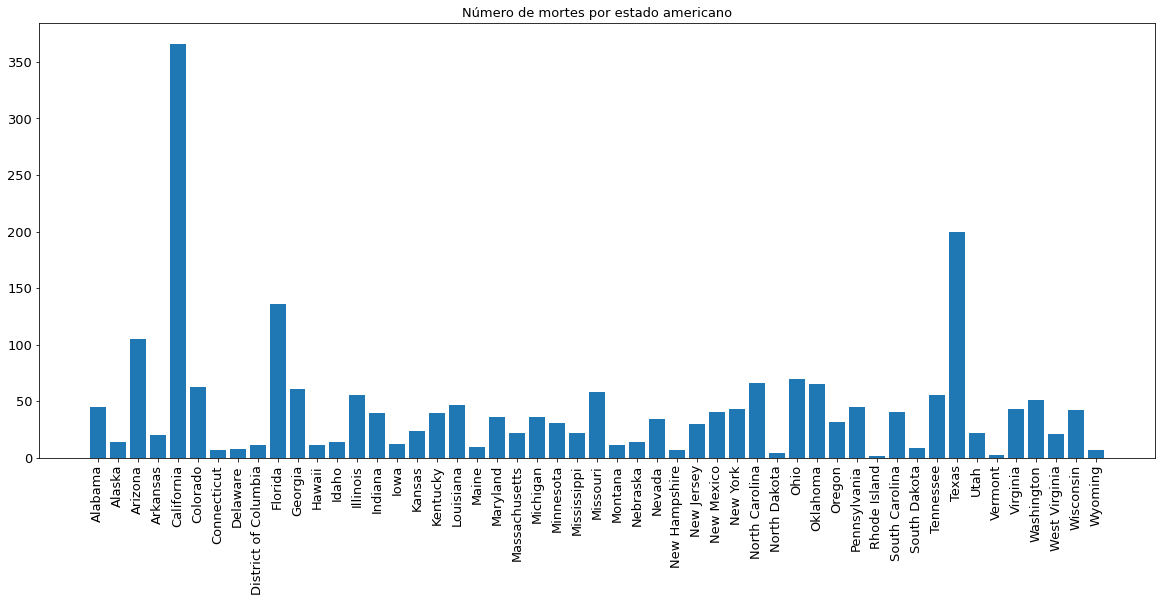

In [17]:
#Exercício 12 
figure = plt.figure(figsize=(20,8))

plt.bar(x = mortesAgrupadasEstado.index, height = mortesAgrupadasEstado.values, align='center')

x =  plt.xticks(color="black",fontsize="13", rotation=90)
y = plt.yticks(color="black", fontsize="13")

title = plt.title("Número de mortes por estado americano", fontsize=13, color="black")

### 6.2 - Quantificando o número  de assassinatos de acordo com a sua maneira de execução - ***manner_of_death***.  (Gráfico de setores)



Outra análise interessante que podemos fazer é descobrir de que maneira as vítimas foram assassinadas. Um gráfico de setores (pizza) pode nos ajudar a visualizar de maneira mais intituiva esse aspecto. 

Então, vamos lá. Assim como no gráfico passado nós vamos precisar fazer a contagem de mortes agrupando por um atributo, só que agora ao invés de usarmos a coluna *gender*, vamos utilizar a coluna *manner_of_death*.

No exercício 13, repita o procedimento de agrupamento realizado anteriormente, modificando a variável de agrupamento. Salve o resultado em variável chamada **`mortesAgrupadasPorManeira`**.

In [18]:
#Exercício 13

mortesAgrupadasPorManeira = policeKillingDF.groupby(by="manner_of_death").size()
print(mortesAgrupadasPorManeira)


manner_of_death
shot                2100
shot and Tasered     154
dtype: int64


Agora que você já agrupou os dados, preencha os elementos faltantes na célula do exercício 14. Dessa vez preencha o paramêtro x, com os valores agrupados e o parêmetro labels com as maneiras do morte indentificadas no exercício anterior. Utilize os atributos `values`  e `index`, respectivamente. 

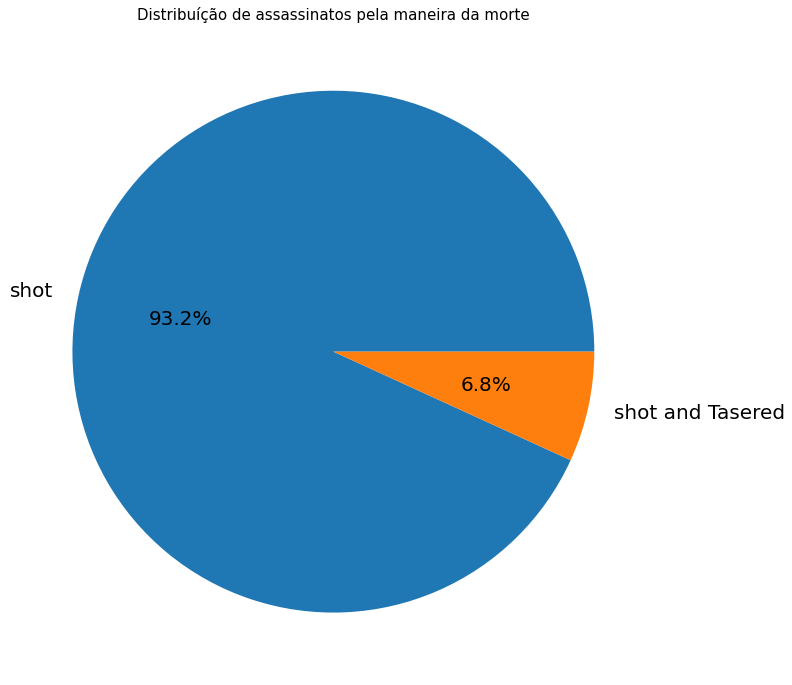

In [19]:
#Exercício 14
figure = plt.figure(figsize=(12,12))

plt.pie(x = mortesAgrupadasPorManeira.values, 
        labels=mortesAgrupadasPorManeira.index, 
        shadow=False, 
        autopct='%1.1f%%', textprops={'fontsize': 20})

plt.title("Distribuíção de assassinatos pela maneira da morte", fontsize=15)

plt.show()

## 6.3 - Distribuíção das mortes no tempo (Grafico de linha)


Um gráfico bastante útil quando estamos trabalhando com séries temporais é o gráfico de linha. Vamos aproveitar que a nossa base de dados nos oferece a data dos assassinatos, e que nós já desagregamos esta variável, para criar gráficos de linha que nos mostram como o número de mortes variou durante os meses nos anos de 2015 a 2017.





Dessa vez antes de fazer a agregação, eu optei por ordenar a nossa base de dados pela data das ocorrências, isso é útil para que o nosso gŕafico fique na ordem temporal correta (De janeiro a dezembro).

Feito isso, a nossa próxima etapa é fazer a contagem agrupando pelo atributo desejado, noavamente utilizando a contagem como função de agregação.

Como dessa vez nós queremos contar por mês e por ano, vamos precisar usar as duas colunas (*month and year*). Além disso, você vai precisar fazer mais um agrupamento de maneira encadeada, só que dessa vez a função de agregação vai ser a `soma`, assim para cada ano você vai poder somar todos os assassinatos ocorridos em cada mês.

Execute a célula abaixo e veja como fica o resultado.


In [20]:
policeKillingDF.sort_values(by='date', inplace=True)
mortesPorMesPorAno = policeKillingDF.groupby(["month", "year"], sort=False).size().groupby(['year', 'month']).sum()
mortesPorMesPorAno


year  month
2015  Jan      68
      Feb      76
      Mar      86
      Apr      87
      May      84
      Jun      67
      Jul      81
      Aug      82
      Sep      84
      Oct      83
      Nov      76
      Dec      73
2016  Jan      80
      Feb      78
      Mar      81
      Apr      70
      May      76
      Jun      81
      Jul      70
      Aug      73
      Sep      65
      Oct      68
      Nov      74
      Dec      57
2017  Jan      70
      Feb      63
      Mar      62
      Apr      52
      May      44
      Jun      42
      Jul      34
      Aug      12
      Sep      14
      Oct      15
      Nov      11
      Dec      15
dtype: int64

Agora você já pode fazer o *plot* dos seus gráficos. Complete o exercicío 15, preenchendo os parâmetros faltantes na função *`plot()`* . O primeiro parâmetro já está preenchido, utilizando o atributo **`index`** da nossa variável de contagem. Insira o segundo parâmetro utilizando o atributo **`values`**.

Preencha também os títulos dos eixos X (os meses) e Y (Contagem de mortes) com as descrições que achar mais adequada.


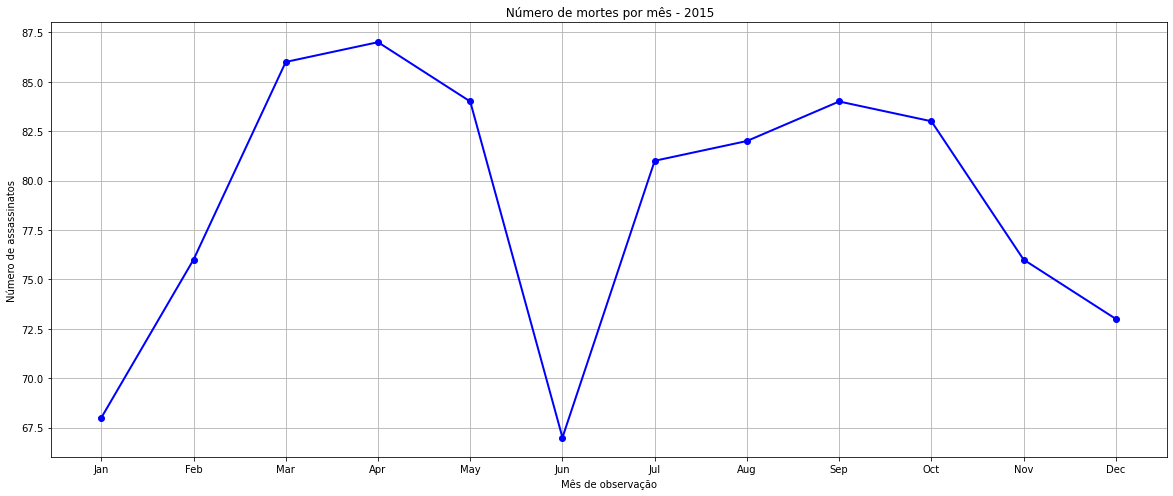

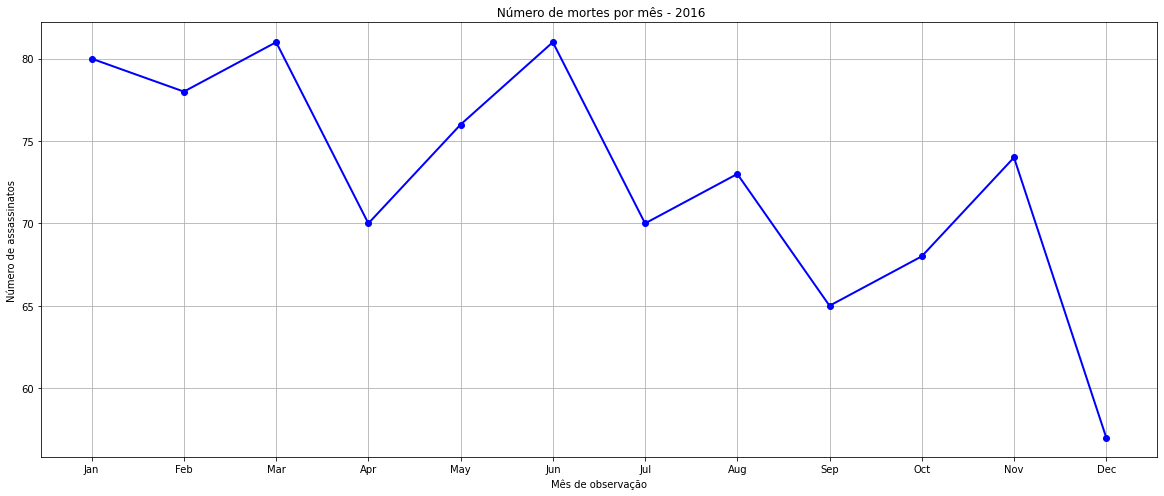

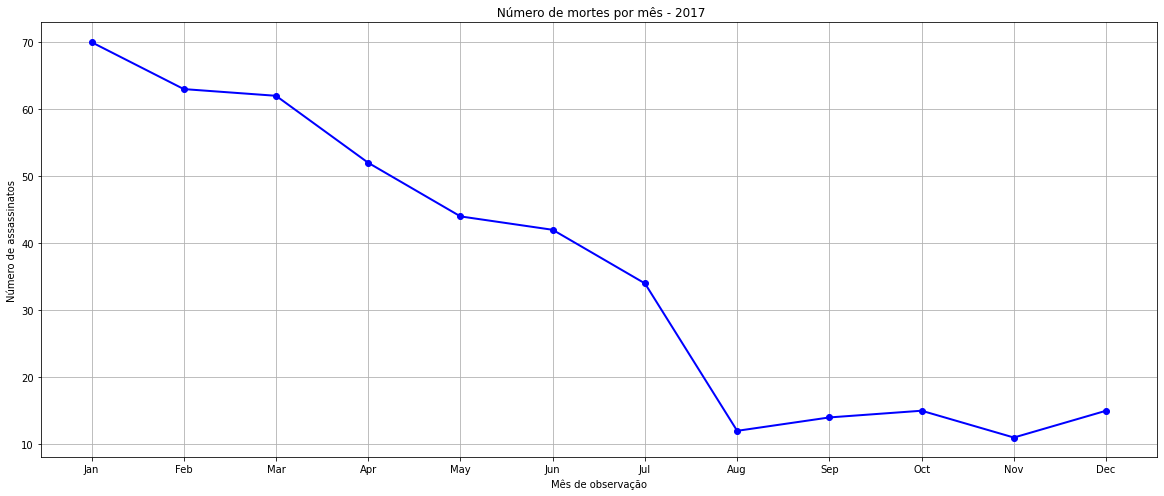

In [21]:
#Exercício 15
for i in np.arange(2015,2018):
    fig, ax = plt.subplots(figsize = (20,8))
    ax.grid()
    
    ax.plot(mortesPorMesPorAno.xs(i).index,mortesPorMesPorAno.xs(i).values, '-bo', linewidth=2)

    settings = ax.set(xlabel='Mês de observação',
                    ylabel='Número de assassinatos',
                    title=" Número de mortes por mês - " + str(i))
    plt.show()
